<a href="https://colab.research.google.com/github/Edenshmuel/ICU_Nutrition_ML/blob/main/Patient_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Loading Preprocessing Pipeline from GitHub**

In [2]:
import requests
import nbformat
from nbconvert import PythonExporter

url = "https://raw.githubusercontent.com/Edenshmuel/ICU_Nutrition_ML/refs/heads/main/Pipeline_test.ipynb"

response = requests.get(url)

if response.status_code == 200:
    notebook_content = response.text
    notebook = nbformat.reads(notebook_content, as_version=4)
    python_exporter = PythonExporter()
    source, _ = python_exporter.from_notebook_node(notebook)
    exec(source)

    print("Pipeline loaded successfully from GitHub!")
else:
    print(f"Failed to fetch notebook: {response.status_code}")

Pipeline loaded successfully from GitHub!


**Importing the Data**

Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

Cloning the Project Repository

In [4]:
!git clone https://github.com/Edenshmuel/ICU_Nutrition_ML.git

Cloning into 'ICU_Nutrition_ML'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 152 (delta 60), reused 41 (delta 41), pack-reused 76 (from 1)
Receiving objects: 100% (152/152), 1.56 MiB | 5.74 MiB/s, done.
Resolving deltas: 100% (90/90), done.


Loading the Dataset

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Edenshmuel/ICU_Nutrition_ML/refs/heads/main/Food_and_Nutrition__.csv")
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


**Data Preprocessing**

Categorize Features

In [6]:
numerical_features = ["Ages", "Height", "Weight", "Sugar", "Carbohydrates", "Fiber"]
categorical_features = ["Gender", "Dietary Preference"]
Multy_categorical_features = ["Disease"]
ordinal_features = ["Activity Level"]
right_skewed_features = ["Protein", "Sodium", "Daily Calorie Target", "Fat"]

Removing Non-Contributing Columns

In [7]:
columns_to_remove = ["Calories", "Breakfast Suggestion", "Lunch Suggestion",
                     "Dinner Suggestion", "Snack Suggestion"]

df = df.drop(columns=columns_to_remove)

**Apply the Pipeline**

In [8]:
preprocessor = create_preprocessor(numerical_features, categorical_features, Multy_categorical_features, ordinal_features, right_skewed_features)
df_transformed_array = preprocessor.fit_transform(df)
feature_names = get_feature_names(preprocessor, df.columns)

In [9]:
df_transformed = pd.DataFrame(df_transformed_array, columns=feature_names)
df_transformed.head()

,Protein,Sodium,Daily Calorie Target,Fat,Activity Level,Ages,Height,Weight,BMI,Sugar,...,Dietary Preference_Pescatarian,Dietary Preference_Vegan,Dietary Preference_Vegetarian,Acne,Diabetes,Heart Disease,Hypertension,Kidney Disease,Weight Gain,Weight Loss
0,0.464201,0.456658,0.395588,0.436808,2.0,0.218183,0.633571,0.561175,0.567524,0.568210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.248564,0.242139,0.222768,0.180422,1.0,0.384024,0.331118,0.332526,0.394498,0.395216,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.367128,0.359677,0.469411,0.487647,0.0,0.659008,0.535632,0.750865,0.709128,0.709672,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.546390,0.539214,0.568428,0.619805,3.0,0.751893,0.224192,0.414058,0.828988,0.829344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.248564,0.242139,0.395588,0.381619,0.0,0.833824,0.434870,0.628051,0.567524,0.568210,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Exploratory Data Analysis - EDA**

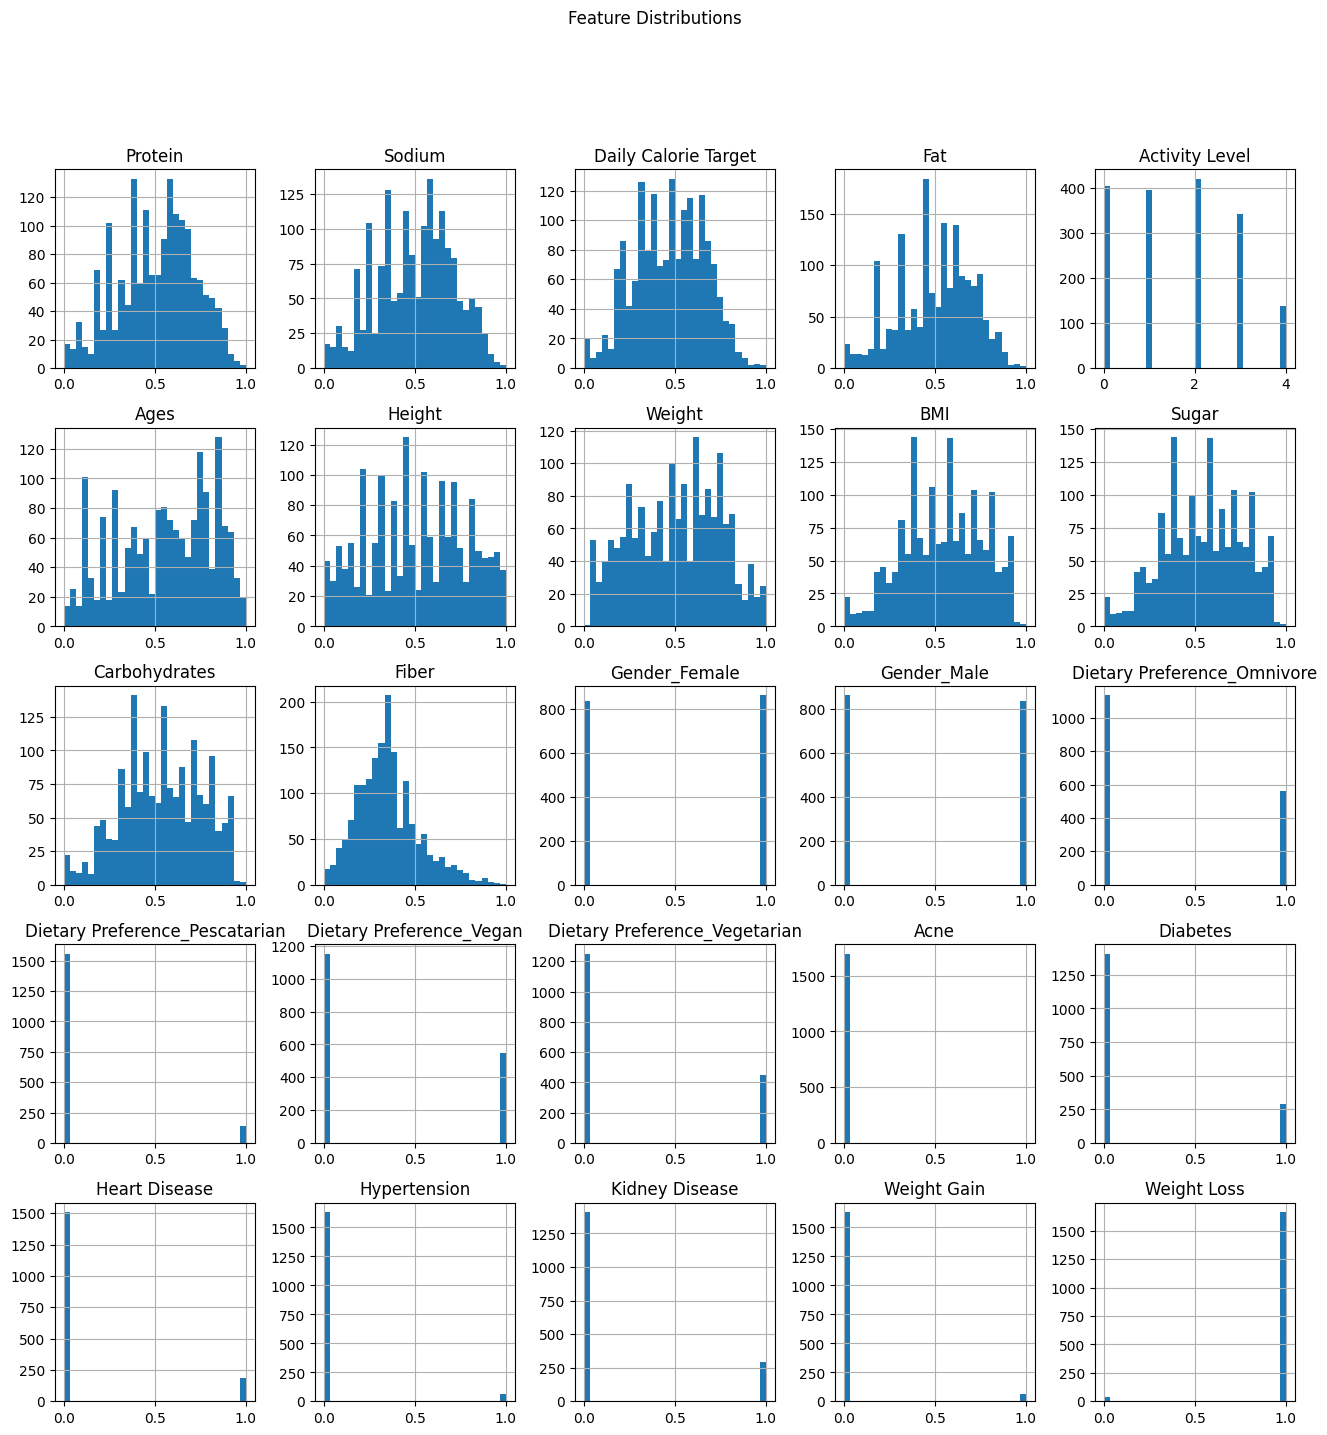

In [10]:
df_transformed.hist(figsize=(16, 16), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [11]:
print(df_transformed.describe())

           Protein       Sodium  Daily Calorie Target          Fat  \
count  1698.000000  1698.000000           1698.000000  1698.000000   
mean      0.506249     0.500140              0.471959     0.501230   
std       0.210577     0.210896              0.191921     0.202863   
min       0.000000     0.000000              0.000000     0.000000   
25%       0.367128     0.359677              0.313986     0.346088   
50%       0.530927     0.523654              0.469411     0.525618   
75%       0.662459     0.656386              0.624881     0.658459   
max       1.000000     1.000000              1.000000     1.000000   

       Activity Level         Ages       Height       Weight          BMI  \
count     1698.000000  1698.000000  1698.000000  1698.000000  1698.000000   
mean         1.655477     0.552088     0.508032     0.508141     0.544697   
std          1.261238     0.262225     0.268337     0.242593     0.219749   
min          0.000000     0.000000     0.000000     0.000000 

The distribution analysis indicates that features 0 to 6 are numerical and appear to follow a normal distribution. Based on their statistical summary, there is no significant presence of extreme outliers that would require removal

In [12]:
pca = PCA(n_components=5)
pca.fit(df_transformed)

print("Explained Variance Ratio:", pca.explained_variance_ratio_.cumsum())

Explained Variance Ratio: [0.44439772 0.59476297 0.67784543 0.75389513 0.82482495]


PCA shows that 86% of the variance is captured by the first five components, improving clustering efficiency and reducing computation

**Clustering**

To determine the optimal number of clusters (K), we will evaluate three different clustering validation metrics:


1.   Elbow Method
2.   Silhouette Score
3.   Davies-Bouldin Index



Elbow Method

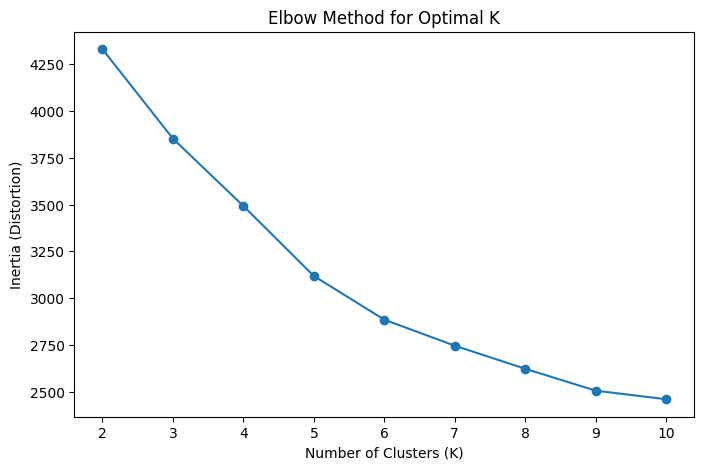

In [13]:
k_range = range(2, 11)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_transformed)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method for Optimal K")
plt.show()

Silhouette Score

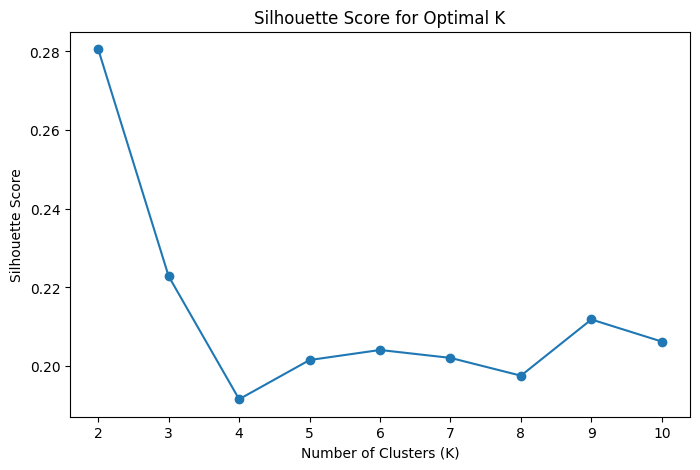

In [14]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_transformed)
    score = silhouette_score(df_transformed, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

Davies-Bouldin Index

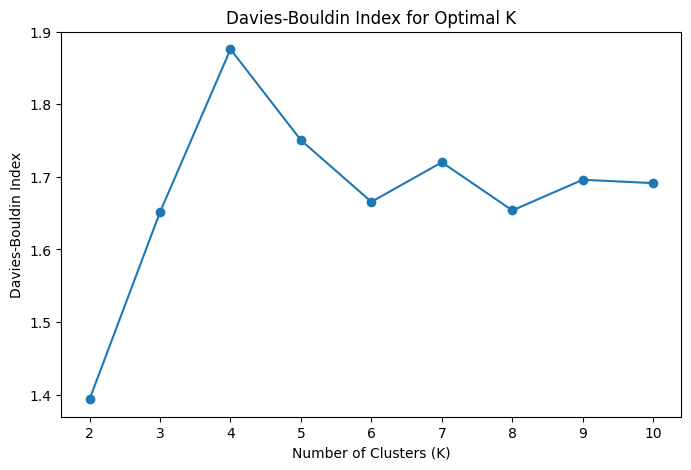

In [15]:
dbi_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_transformed)
    score = davies_bouldin_score(df_transformed, labels)
    dbi_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, dbi_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index for Optimal K")
plt.show()

Since each method suggested a different optimal K, we will analyze the metric scores to determine the best balance between cluster separation, compactness, and structure

    K  Silhouette Score  Davies-Bouldin Index      Inertia
0   2          0.280560              1.393629  4330.051494
1   3          0.222848              1.651447  3852.452765
2   4          0.191601              1.875906  3492.147653
3   5          0.201561              1.750507  3118.119801
4   6          0.204118              1.665610  2884.534977
5   7          0.202106              1.720106  2745.471649
6   8          0.197587              1.653792  2622.148708
7   9          0.211871              1.696063  2505.044218
8  10          0.206251              1.691389  2459.246491


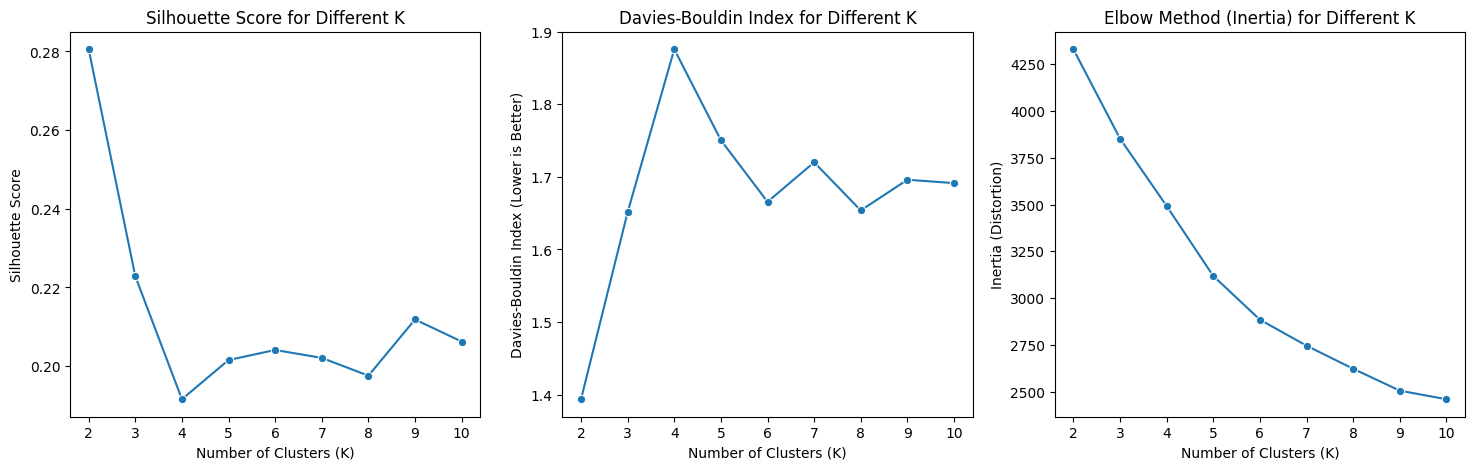

In [16]:
k_range = range(2, 11)
silhouette_scores = []
dbi_scores = []
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_transformed)

    silhouette_scores.append(silhouette_score(df_transformed, labels))
    dbi_scores.append(davies_bouldin_score(df_transformed, labels))
    inertia_values.append(kmeans.inertia_)

metrics_df = pd.DataFrame({
    "K": list(k_range),
    "Silhouette Score": silhouette_scores,
    "Davies-Bouldin Index": dbi_scores,
    "Inertia": inertia_values})

print(metrics_df)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

#Silhouette Score
sns.lineplot(x=k_range, y=silhouette_scores, marker="o", ax=ax[0])
ax[0].set_title("Silhouette Score for Different K")
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("Silhouette Score")

#Davies-Bouldin Index
sns.lineplot(x=k_range, y=dbi_scores, marker="o", ax=ax[1])
ax[1].set_title("Davies-Bouldin Index for Different K")
ax[1].set_xlabel("Number of Clusters (K)")
ax[1].set_ylabel("Davies-Bouldin Index (Lower is Better)")

#Inertia (Elbow Method)
sns.lineplot(x=k_range, y=inertia_values, marker="o", ax=ax[2])
ax[2].set_title("Elbow Method (Inertia) for Different K")
ax[2].set_xlabel("Number of Clusters (K)")
ax[2].set_ylabel("Inertia (Distortion)")

plt.show()

We selected K=6 as it provides the best balance between cluster separation (Silhouette Score) and compactness (lowest Davies-Bouldin Index), ensuring well-defined and distinct clusters

In [17]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_transformed["Cluster"] = kmeans.fit_predict(df_transformed)

cluster_counts = df_transformed["Cluster"].value_counts()

print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
Cluster
2    427
0    331
3    317
4    288
1    197
5    138
Name: count, dtype: int64


In [18]:
cluster_summary = df_transformed.groupby("Cluster").mean()

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
          Protein    Sodium  Daily Calorie Target       Fat  Activity Level  \
Cluster                                                                       
0        0.494424  0.488249              0.483631  0.512125        2.483384   
1        0.293278  0.287227              0.252946  0.187132        0.370558   
2        0.573323  0.567319              0.559459  0.572265        2.423888   
3        0.501080  0.494461              0.461566  0.502697        0.498423   
4        0.443700  0.437156              0.393642  0.487590        0.593750   
5        0.773504  0.769233              0.673189  0.728788        4.000000   

             Ages    Height    Weight       BMI     Sugar  ...  \
Cluster                                                    ...   
0        0.496527  0.490880  0.486224  0.570901  0.571490  ...   
1        0.643800  0.390224  0.386989  0.309227  0.309686  ...   
2        0.517931  0.576249  0.586190  0.653884  0.654417  ...   
3        0.607187  0